<a href="https://colab.research.google.com/github/Nyauntu/Data-science-practice/blob/main/Nyauntu_Nelly_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Flavors of Cacao



In this assignment you will be doing some initial data management and simple exploration using Python.   Use of the Gemini tools within Colab is allowed, but **I suggest you attempt the problems without inline AI assistance** - by going to Settings in Colab via the gear icon ⚙ => AI Assistance => uncheck "Show AI Powered Inline Completions".   This will allow you to attempt to code without AI shoving the answer in your face.  You can always ask for AI assistance using the Gemini star icon ⭐ at the bottom of the page.   But you will learn more by trying things yourself first.


---

<h3>**Before you start!**</h3>

*Save a copy of this file to your own Google Drive (and make sure you are on the correct Google account!)*

---


Use Case:  You are working for a small batch chocolatier in Brooklyn.  Your chocolates have gotten a small but passionate following amongst friends and you are starting to get some attention.  You would like to expand your options to appeal to a broader customer base, and perhaps break out of your region.  

In order to understand the market better, you come across a data set of chocolate tastings, on the website [Flavors of Cacao](https://flavorsofcacao.com/chocolate_database.html).  Take a look at the data available on that site, it has thousands of ratings of chocolate bars, along with characteristics of the bars from human raters.


1.  **Describe how you can use this data to help you design and market a new chocolate bar for your catalog.    Specifically, your partner Charlie proposes that you just use this data to find the highest rated country, bean, and flavor profile, and create a bar with all of those properties.  What is wrong with Charlie's proposal?**

This data can be used to identify trends in what consumers tend to rate highly, such as preferred cocoa  bean , and flavor characteristics.
These insights can guide product development and marketing by helping us design a chocolate bar that aligns with general consumer preferences.
Charlie's idea undermines the fact that consumer preferences are not necessarily about just combining these features. We have to identify patterns in these attributes so that we come up with the right mix

2. **[Import the data locally using this link](https://drive.google.com/uc?export=download&id=1vzPK4RuM6X3JpHLPEjBe9gvQru5LECE1).  Then import into Colab using the left hand menu as we showed in class.   Import the appropriate Python libraries (`pandas, numpy, matplotlib, and seaborn`), and read the file into your session using `read_excel` from pandas.  Report on the number of rows and columns in the data.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read file in using pd.read_excel()
df = pd.read_excel("chocolate_ratings.xlsx")
#getting the number of rows and columns in the file
num_rows = len(df)          # Gets the number of rows
num_cols = len(df.columns)  # Gets the number of columns

print(f"Number of rows is: {num_rows}")
print(f"Number of columns is: {num_cols}")


Number of rows is: 2789
Number of columns is: 10


3. **Inspect the data using `.head()` and `.info()`.    It is bad form to have dots in feature names, and these names are kind of unwieldy.  Use `.rename` to create shorter, more compact feature names without punctuation (e.g. `CocoaPercent`).  Which of the features do you think are going to be the most useful for your exploration?**

I think the most important columns would be the: Rating ,CocoaPercent,BeanOrigin ,CompanyLocation for the business because they would help influence market positioning and sourcing.


In [3]:
df.head()


,REF,Company..Manufacturer.,Company.Location,Review.Date,Country.of.Bean.Origin,Specific.Bean.Origin.or.Bar.Name,Cocoa.Percent,Ingredients,Most.Memorable.Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
4,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2789 non-null   int64  
 1   Company..Manufacturer.            2789 non-null   object 
 2   Company.Location                  2789 non-null   object 
 3   Review.Date                       2789 non-null   int64  
 4   Country.of.Bean.Origin            2789 non-null   object 
 5   Specific.Bean.Origin.or.Bar.Name  2789 non-null   object 
 6   Cocoa.Percent                     2789 non-null   object 
 7   Ingredients                       2702 non-null   object 
 8   Most.Memorable.Characteristics    2789 non-null   object 
 9   Rating                            2789 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 218.0+ KB


In [5]:
#renaming the columbs to reduce the weird dots and spaces in the naming
df.rename(columns={
    "Cocoa.Percent": "CocoaPercent",
    "Company.Location": "CompanyLocation",
    "Company..Manufacturer.": "ManufacturerCompany",
    "Review.Date": "ReviewDate",
    "Specific.Bean.Origin.or.Bar.Name": "SpecificBeanOrigin",
    "Most.Memorable.Characteristics": "MemorableCharacteristics",
    "Country.of.Bean.Origin": "BeanOrigin"
}, inplace=True)

#checking whether the chnages made on the column names are updated
df.head()

,REF,ManufacturerCompany,CompanyLocation,ReviewDate,BeanOrigin,SpecificBeanOrigin,CocoaPercent,Ingredients,MemorableCharacteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
4,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


In [6]:
#changing the Review date to date because it is recognized as an integer type
df["ReviewDate"] = pd.to_datetime(df["ReviewDate"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REF                       2789 non-null   int64         
 1   ManufacturerCompany       2789 non-null   object        
 2   CompanyLocation           2789 non-null   object        
 3   ReviewDate                2789 non-null   datetime64[ns]
 4   BeanOrigin                2789 non-null   object        
 5   SpecificBeanOrigin        2789 non-null   object        
 6   CocoaPercent              2789 non-null   object        
 7   Ingredients               2702 non-null   object        
 8   MemorableCharacteristics  2789 non-null   object        
 9   Rating                    2789 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 218.0+ KB


4.  **Report whether there are any many missing values for any feature (using `isnull()`).  How might you deal with this issue?**

In [7]:
df.isnull().sum() #checking missiong values
#If missing values are minimal, we can drop them. If they are large we may impute values or exclude affected columns depending on importance they are or their impact on data analysis

,0
REF,0
ManufacturerCompany,0
CompanyLocation,0
ReviewDate,0
BeanOrigin,0
SpecificBeanOrigin,0
CocoaPercent,0
Ingredients,87
MemorableCharacteristics,0
Rating,0


5. **Report on the number of bars that are manufactured in Brazil as compared to the number of bars that come from Brazilian beans.**

In [8]:
bars_from_brazil = df[df["CompanyLocation"] == "Brazil"].shape[0]
beans_from_brazil = df[df["BeanOrigin"] == "Brazil"].shape[0]

print(f"Number of bars from Brazil is: {bars_from_brazil}")
print(f"Number of beans from Brazil is: {beans_from_brazil}")

Number of bars from Brazil is: 27
Number of beans from Brazil is: 83


6.  **Charlie suggests that you source your beans from the country that has the highest rated bars.  Use a `.groupby()` to find the `CountryofBeanOrigin` that has the best average (mean) `Rating`.   How many bars have that country of origin?  Would you recommend sourcing beans from that country?**


In [10]:
# average rating by bean origin
origin_ratings = df.groupby("BeanOrigin")["Rating"].mean()

# find best origin
best_origin = origin_ratings.idxmax()
best_rating = origin_ratings.max()

# number of bars from that origin
num_bars = df[df["BeanOrigin"] == best_origin].shape[0]

print("Highest rated bean origin:", best_origin)
print("Average rating:", best_rating)
print("Number of bars:", num_bars)

#Although Tobago has the highest average rating, the number of bars is only two.
#Therefore, sourcing decisions should consider both quality and sample size rather than just averages.

Highest rated bean origin: Tobago
Average rating: 3.625
Number of bars: 2


7.  **We want to explore the relationship between CocoaPercent and Rating.  Note that CocoaPercent initially has a percent sign and was probably imported as a character (or `object`), so create a numeric version of this feature first.   Then calculate the correlation between CocoaPercent and Rating.   Interpret this number.**

In [12]:
df["CocoaPercentNum"] = (
    df["CocoaPercent"]
    .str.replace("%", "")
    .astype(float)
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REF                       2789 non-null   int64         
 1   ManufacturerCompany       2789 non-null   object        
 2   CompanyLocation           2789 non-null   object        
 3   ReviewDate                2789 non-null   datetime64[ns]
 4   BeanOrigin                2789 non-null   object        
 5   SpecificBeanOrigin        2789 non-null   object        
 6   CocoaPercent              2789 non-null   object        
 7   Ingredients               2702 non-null   object        
 8   MemorableCharacteristics  2789 non-null   object        
 9   Rating                    2789 non-null   float64       
 10  CocoaPercentNum           2789 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 239.8+ KB


In [14]:
#correltion between cocoa percent and rating
correlation = df["CocoaPercentNum"].corr(df["Rating"]).round(2)
print("Correlation:", correlation)

#there correlation is -0.14 which indicates a very weak negative relationship between the percentage of cocoa and the rating
#This suggests that chocolates with higher cocoa percentages tend to receive slightly lower ratings on average, but the relationship is minimal.




Correlation: -0.14


8. **Plot a scatterplot using `.scatterplot()` from `seaborn` library of the numeric CocoaPercent vs. Rating.   What do you conclude about the relationship from this scatterplot?  Can you see any problems or issues with this plot?**

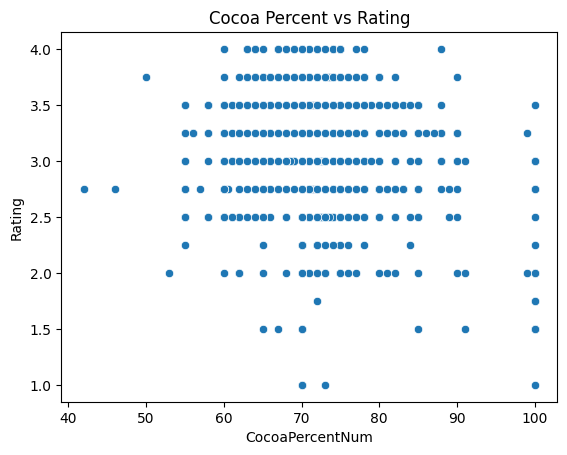

In [16]:
sns.scatterplot(
    x="CocoaPercentNum",
    y="Rating",
    data=df
)

plt.title("Cocoa Percent vs Rating")
plt.show()
#The scatterplot shows no strong linear relationship between the two variables and this means that there are other features that influence the ratings more strongly
#also within the varying cocoa percentages, there is variations in the rating

9. **Now create a binned version of `CocoaPercent` (e.g. 50-60%, 60-70%, etc) and calculate the average `Rating` within each bin. (you can do this with `.cut()` and `.groupby()`)  Does your interpretation of the relationship between CocoaPercent and Rating change?**

In [17]:
bins = [40, 50, 60, 70, 80, 90, 100]

df["CocoaBin"] = pd.cut(df["CocoaPercentNum"], bins)

bin_avg = df.groupby("CocoaBin")["Rating"].mean()

print("The bin average is: ",bin_avg)
#the highest average rating occurs in the 60–70% cocoa range, with ratings slightly declining at higher cocoa levels.
#Extremely high cocoa percentages (90–100%) receive noticeably lower ratings compared to the rest
#but also the averages within the bins are not so different from each other except for thr 90-100 bins


The bin average is:  CocoaBin
(40, 50]     3.083333
(50, 60]     2.976974
(60, 70]     3.254115
(70, 80]     3.170327
(80, 90]     3.010526
(90, 100]    2.298077
Name: Rating, dtype: float64


/tmp/ipython-input-1067461780.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df.groupby("CocoaBin")["Rating"].mean()


10. **Mention one interesting thing you found when looking through this data.**  

One interesting thing I noticed in the data is that chocolate ratings are clearly influenced by many factors, which was not surprising given how subjective taste and quality can be.
 However, I was surprised to see that cocoa percentage has very little effect on ratings in terms of consumer preferences.

# REMEMBER TO SAVE THIS NOTEBOOK TO YOUR OWN GOOGLE DRIVE!

##Please submit homework to Brightspace in the form of a file named **`lastname_firstname.ipynb`** (no PDF needed)
##but make sure all output is visible as part of the `.ipynb` file